<a href="https://colab.research.google.com/github/anjali0503/Convolutional-Neural-Network/blob/main/Digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print('Tensorflow Version {}'.format(tf.__version__))


Tensorflow Version 2.6.0


[link text](https://)#**Loading  - "MNIST Data Set"**

1.   List item
2.   List item



##Containing Training Samples = 600000, Testing sample = 10000

In [12]:



mnist = tf.keras.datasets.mnist

In [13]:
print(mnist)

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>


After loading the data lets divide it into train and test datasets[link text](https://)

In [14]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [15]:
x_train.shape

(60000, 28, 28)

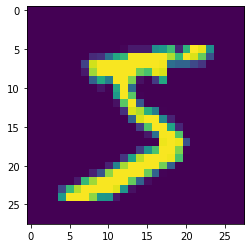

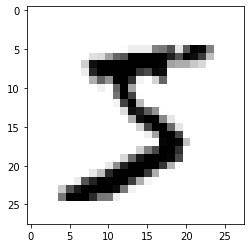

In [16]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)


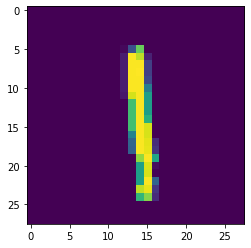

In [17]:
plt.imshow(x_train[8])
plt.show()


Let's check the value of each piont

# **Before Normalization**

In [41]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

As images are in Gray level (1 channel==> 0 to 255), not coloured(RGB)

lets normalized the data || Pre-Prosessing Step

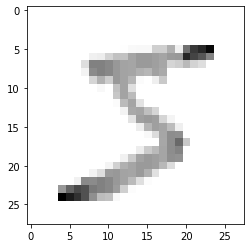

In [42]:
x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis= 1)
plt.imshow(x_train[0],cmap = plt.cm.binary)

After normalizing lets check the values

In [43]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [44]:
num_classes = print(y_train[0])

5


Resizing image to make its suitable for apply Convolution operation
bold text

In [45]:
import numpy as np
IMG_SIZE = 28

x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) ## INCRESEING 1D FOR KERNAL OPERATION
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

print("Training samples dimensions",x_trainr.shape)
print("Testing sampples dimensions",x_testr.shape)

Training samples dimensions (60000, 28, 28, 1)
Testing sampples dimensions (10000, 28, 28, 1)


# Creating a DEEP NEURAL NETWORK

Training on 60000 sample of MNIST handwritten dataset

In [25]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation, Flatten, Conv2D, MaxPooling2D

In [26]:
model = Sequential()

#first convolutional layers
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation('relu'))  #TO MAKE NON LINEAR I.E IF ANY VALUE OS LESS THEN 0 IT WILL DROP THAT VALUE
model.add(MaxPooling2D(pool_size=(2,2)))

#2ND Convolutional layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))  #TO MAKE NON LINEAR I.E IF ANY VALUE OS LESS THEN 0 IT WILL DROP THAT VALUE
model.add(MaxPooling2D(pool_size=(2,2)))


#3rd Convolutional layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))  #TO MAKE NON LINEAR I.E IF ANY VALUE OS LESS THEN 0 IT WILL DROP THAT VALUE
model.add(MaxPooling2D(pool_size=(2,2)))

## fully connected layer 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

#fully layer #2
model.add(Dense(32))
model.add(Activation('relu'))

#fully last layer where output must be equal to 10
model.add(Dense(10))
model.add(Activation('softmax'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)         

In [28]:
print("Total Training samples = ",len(x_trainr))

Total Training samples =  60000


In [29]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [30]:
model.fit(x_trainr,y_train,epochs=5,validation_split= 0.3)

Epoch 1/5
1313/1313 [==============================] - 71s 53ms/step - loss: 0.3371 - accuracy: 0.8940 - val_loss: 0.1345 - val_accuracy: 0.9586
Epoch 2/5
1313/1313 [==============================] - 69s 53ms/step - loss: 0.1090 - accuracy: 0.9664 - val_loss: 0.0993 - val_accuracy: 0.9691
Epoch 3/5
1313/1313 [==============================] - 69s 53ms/step - loss: 0.0772 - accuracy: 0.9761 - val_loss: 0.0819 - val_accuracy: 0.9759
Epoch 4/5
1313/1313 [==============================] - 69s 53ms/step - loss: 0.0645 - accuracy: 0.9801 - val_loss: 0.0646 - val_accuracy: 0.9805
Epoch 5/5
1313/1313 [==============================] - 69s 53ms/step - loss: 0.0514 - accuracy: 0.9838 - val_loss: 0.0605 - val_accuracy: 0.9824


In [31]:
test_loss,test_acc = model.evaluate(x_testr,y_test)
print('Test loss on 10,000 test samples',test_loss)
print('Validation accurarcy on 10000 test sample',test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0538 - accuracy: 0.9844
Test loss on 10,000 test samples 0.05378139019012451
Validation accurarcy on 10000 test sample 0.9843999743461609


In [32]:
predicions = model.predict([x_testr])
print(predicions)

[[1.2845020e-07 3.7355676e-05 3.7586920e-05 ... 9.9991393e-01
  2.8687812e-09 2.7869844e-06]
 [8.5124146e-04 4.4755870e-05 9.9853814e-01 ... 1.1264922e-05
  3.4793987e-04 9.0926153e-07]
 [2.2286758e-07 9.9999380e-01 3.1601058e-08 ... 4.7947287e-07
  2.0248616e-07 7.5184637e-08]
 ...
 [1.6200247e-06 4.2536107e-05 6.1737632e-07 ... 4.7683243e-06
  3.9154569e-05 4.2675878e-05]
 [1.7937002e-04 5.5570767e-06 1.9412387e-07 ... 2.1242604e-07
  6.7479030e-04 6.3524945e-05]
 [3.3908556e-04 8.8798779e-06 4.9642564e-05 ... 8.8674756e-07
  4.4944871e-05 1.4184579e-05]]


In [33]:
print(np.argmax(predicions[0]))


7


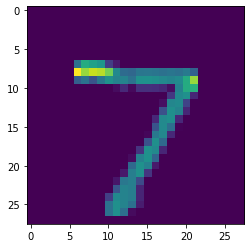

In [34]:
plt.imshow(x_test[0])

In [35]:
print(np.argmax(predicions[105]))

9


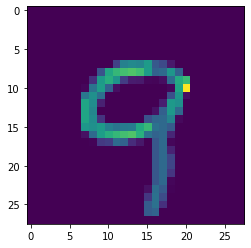

In [36]:
plt.imshow(x_test[105])

In [37]:
from google.colab.patches import  cv2_imshow
import matplotlib.pyplot as plt


In [38]:
import cv2

In [74]:
img = cv2.imread('/content/eight.png')

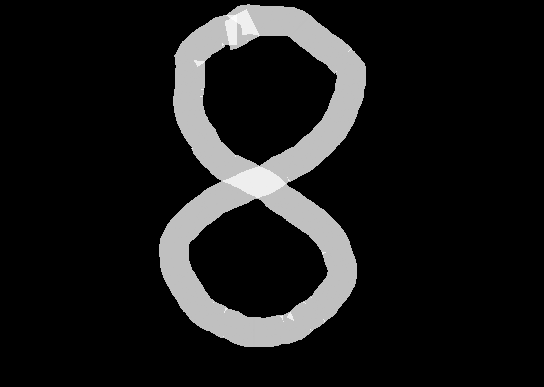

In [75]:
cv2_imshow(img)

In [76]:
img.shape

(387, 544, 3)

In [77]:
gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [78]:



gray.shape

(387, 544)

In [79]:
resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)

In [80]:
resized.shape

(28, 28)

In [81]:
newimg = tf.keras.utils.normalize(resized,axis=1) #normalizing to 1 nd 0



In [82]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE,IMG_SIZE, 1)

In [83]:
newimg.shape

(1, 28, 28, 1)

In [84]:
predicions = model.predict(newimg)

In [85]:
print(np.argmax(predicions))

8
